<h1>Model Training</h1>

This file contains the training of our data with different models. As we're taking an experimental approach, we will use different algorithms and different data pre-processing techniques and compare them via different metrics to get an optimal result

<h2>Imports & Global Constants</h2>

This section will be used to define the different imports and constants we will be using throughout this project

<h3>Imports</h3>

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import pickle #Used to save trained models to a file
import time #Used to calculate training times

<h3>Configuration</h3>

In [9]:
import warnings
warnings.filterwarnings('ignore')

<h3>Load helper methods</h3>

In [362]:
%run helper_methods.ipynb

<h2>Get the data</h2>

The first step in this process is getting the data, we will import the <b>data_preprocessing</b> function created in the <b>data_preprocessing.ipynb</b> file

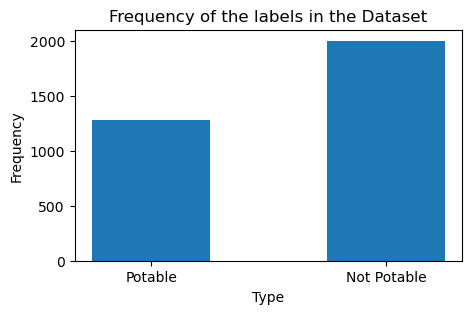

Potable: 39.01%
Not potable: 60.99%


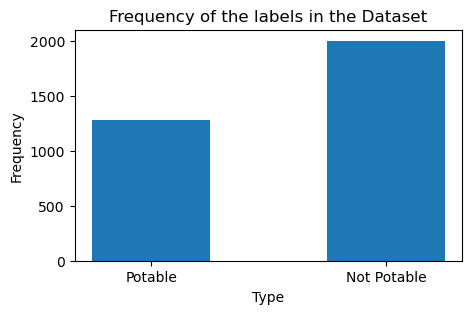

ImportError: cannot import name '_is_arraylike_not_scalar' from 'sklearn.utils.validation' (C:\Users\Shiraz\Anaconda3\lib\site-packages\sklearn\utils\validation.py)

ImportError: cannot import name '_is_arraylike_not_scalar' from 'sklearn.utils.validation' (C:\Users\Shiraz\Anaconda3\lib\site-packages\sklearn\utils\validation.py)

In [350]:
%run data_preprocessing.ipynb

In [12]:
X_train, X_test, y_train, y_test = preprocess_data(
    "../dataset/dataset.csv",
    empty = "fill",
    optimize_features=False,
    normalize=True,
    balancing="SMOTE"
)

<hr style="height:2px; border-width:0; color:black">

<h2>Train Models</h2>

This part of the project uses the preprocessed data on different Machine Learning models (SVM, Random Forests, KNN...). We will use the train portion of the data set to train the model and the test data to gather insight on how well our model is performing.

We will divide this section in one sub-section for each model. Each sub-section will contain the three following steps:
<ol>
    <li>Definition of a set of hyperparameters will will train the model with.</li>
    <li>Training the model with the range of hyperparameters specified in the first step.</li>
    <li>Test the model with the test dataset and display the results in the form of a set of metrics (accuracy, F1-score, precision, recall...). We will store the results for the third section which will contain a thorough analysis / comparison of the performance of the different models.</li>
</ol>

Definition of the data structure storing the metrics of the different models

In [13]:
metrics = {}

List containing the run times for each model

In [14]:
run_times = []

<hr style="height:2px; border-width:0; color:black">

<h3>Random Forest</h3>

<b>Step 1: </b>Definition of the hyperparameters we will be injecting in the model for training:

In [16]:
random_forest_hyperparameters = {
    "n_estimators": [800, 1200, 2000],
    "max_depth": [500, 600, 700],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

<b>Step 2: </b>Train the model with different sets of hyperparameters defined in the first step

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
random_forest_classifier = RandomForestClassifier()

In [19]:
random_forest = RandomizedSearchCV(
    random_forest_classifier,
    random_forest_hyperparameters,
    cv = 10,
    scoring = "f1",
    n_jobs = -1,
    random_state = 42,
)

In [20]:
random_forest_start_time = time.time()
random_forest.fit(X_train, y_train)
random_forest_stop_time = time.time()

In [21]:
random_forest_time = random_forest_stop_time - random_forest_start_time
run_times.append(random_forest_time)
print("Training time: %.2f seconds | (%.2f minutes)" % (random_forest_time, random_forest_time/60))

Training time: 66.02 seconds | (1.10 minutes)


<b>Save the trained model</b>

In [22]:
pickle.dump(random_forest, open(random_forest_saved_model, 'wb'))

<b>Step 3: </b> Predict the test dataset, store, and display the metrics

In [23]:
random_forest_prediction = random_forest.predict(X_test)

In [24]:
metrics["Random Forest"] = [
    accuracy_score(random_forest_prediction, y_test), # calculate the accuracy score of random forest
    f1_score(random_forest_prediction, y_test) # calculate the f1 score of random forest
]

<b>Classification report of Random Forest:</b>

In [25]:
print(classification_report(random_forest_prediction, y_test))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       437
           1       0.50      0.56      0.53       219

    accuracy                           0.67       656
   macro avg       0.63      0.64      0.63       656
weighted avg       0.68      0.67      0.67       656



<b>Confusion Matrix for Random Forest</b>

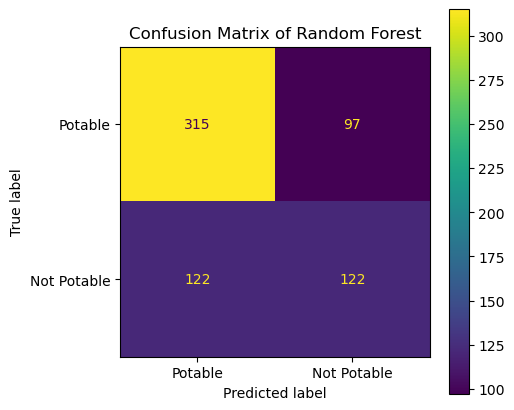

In [26]:
plot_confusion_matrix(y_test, random_forest_prediction, "Confusion Matrix of Random Forest")

<hr style="height:2px; border-width:0; color:black">

<h3>Decision Tree:</h3>

<b>Step 1: </b>Definition of the hyperparameters we will be injecting in the model for training:

In [27]:
decision_tree_hyperparameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1000, 1500, 2000, 2500],
    "min_samples_split": [2, 5, 10, 15, 100],
    "min_samples_leaf": [1, 2, 5, 10]
}

<b>Step 2: </b>Train the model with different sets of hyperparameters defined in the first step

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
decision_tree_classifier = DecisionTreeClassifier()

In [30]:
decision_tree = RandomizedSearchCV(
    decision_tree_classifier,
    decision_tree_hyperparameters,
    cv = 10,
    scoring = "f1",
    n_jobs = -1,
    random_state = 42
)

In [31]:
decision_tree_start_time = time.time()
decision_tree.fit(X_train, y_train)
decision_tree_stop_time = time.time()

In [32]:
decision_tree_time = decision_tree_stop_time - decision_tree_start_time
run_times.append(decision_tree_time)
print("Training time: %.2f seconds | (%.2f minutes)" % (decision_tree_time, decision_tree_time/60))

Training time: 0.36 seconds | (0.01 minutes)


<b>Save the trained model</b>

In [33]:
pickle.dump(decision_tree, open(decision_tree_saved_model, 'wb'))

<b>Step 3: </b> Predict the test dataset, store, and display the metrics

In [34]:
decision_tree_prediction = decision_tree.predict(X_test)

In [35]:
metrics["Decision Tree"] = [
    accuracy_score(decision_tree_prediction, y_test), # calculate the accuracy score of decision tree
    f1_score(decision_tree_prediction, y_test) # calculate the f1 score of decision tree
]

<b>Classification report of Decision Tree:</b>

In [36]:
print(classification_report(decision_tree_prediction, y_test))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       380
           1       0.51      0.45      0.48       276

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.58      0.59      0.58       656



<b>Confusion Matrix for Decision Tree</b>

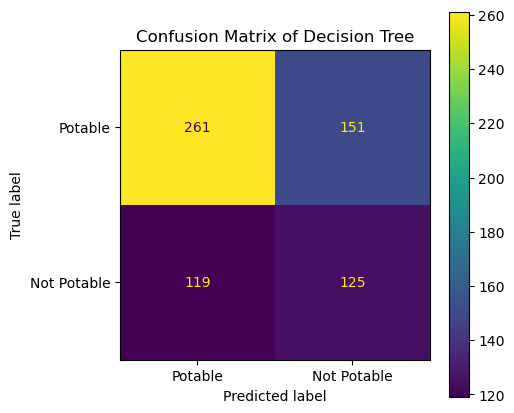

In [37]:
plot_confusion_matrix(y_test, decision_tree_prediction, "Confusion Matrix of Decision Tree")

<hr style="height:2px; border-width:0; color:black">

<h3>K Nearest Neighbors:</h3>

<b>Step 1: </b>Definition of the hyperparameters we will be injecting in the model for training:

In [38]:
knn_hyperparameters = {
    "n_neighbors": range(3,100,2)
}

<b>Step 2: </b>Train the model with different sets of hyperparameters defined in the first step

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_classifier = KNeighborsClassifier()

In [41]:
knn = RandomizedSearchCV(
    knn_classifier,
    knn_hyperparameters,
    cv = 10,
    scoring = "f1",
    n_jobs = -1,
    random_state = 42
)

In [42]:
knn_start_time = time.time()
knn.fit(X_train, y_train)
knn_stop_time = time.time()

In [43]:
knn_time = knn_stop_time - knn_start_time
run_times.append(knn_time)
print("Training time: %.2f seconds | (%.2f minutes)" % (knn_time, knn_time/60))

Training time: 0.23 seconds | (0.00 minutes)


<b>Save the trained model</b>

In [44]:
pickle.dump(knn, open(knn_saved_model, 'wb'))

<b>Step 3: </b> Predict the test dataset, store, and display the metrics

In [45]:
knn_prediction = knn.predict(X_test)

In [46]:
metrics["KNN"] = [
    accuracy_score(knn_prediction, y_test), # calculate the accuracy score of k nearest neighbors
    f1_score(knn_prediction, y_test) # calculate the f1 score of k nearest neighbors
]

<b>Classification report of K Nearest Neighbors:</b>

In [47]:
print(classification_report(knn_prediction, y_test))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67       353
           1       0.60      0.48      0.53       303

    accuracy                           0.61       656
   macro avg       0.61      0.60      0.60       656
weighted avg       0.61      0.61      0.61       656



<b>Confusion Matrix for K Nearest Neighbors</b>

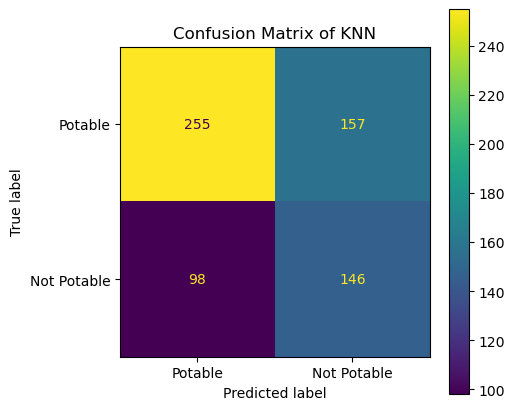

In [48]:
plot_confusion_matrix(y_test, knn_prediction, "Confusion Matrix of KNN")

<hr style="height:2px; border-width:0; color:black">

<h3>MLP:</h3>

<b>Step 1: </b>Definition of the hyperparameters we will be injecting in the model for training:

In [49]:
mlp_hyperparameters = {
    "hidden_layer_sizes": [(50,50,50), (50,100,50), (100,)],
    "activation": ['tanh', 'relu'],
    "solver": ['sgd', 'adam'],
    "alpha": [0.0001, 0.05],
    "learning_rate": ['constant','adaptive'],
}

<b>Step 2: </b>Train the model with different sets of hyperparameters defined in the first step

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
mlp_classifier = MLPClassifier()

In [52]:
mlp = RandomizedSearchCV(
    mlp_classifier,
    mlp_hyperparameters,
    cv = 10,
    scoring = "f1",
    n_jobs = -1,
    random_state = 42
)

In [53]:
mlp_start_time = time.time()
mlp.fit(X_train, y_train)
mlp_stop_time = time.time()

<b>Save the trained model</b>

In [54]:
mlp_time = mlp_stop_time - mlp_start_time
run_times.append(mlp_time)
print("Training time: %.2f seconds | (%.2f minutes)" % (mlp_time, mlp_time/60))

Training time: 55.86 seconds | (0.93 minutes)


In [55]:
pickle.dump(mlp, open(mlp_saved_model, 'wb'))

<b>Step 3: </b> Predict the test dataset, store, and display the metrics

In [56]:
mlp_prediction = mlp.predict(X_test)

In [57]:
metrics["MLP"] = [
    accuracy_score(mlp_prediction, y_test), # calculate the accuracy score of mlp
    f1_score(mlp_prediction, y_test) # calculate the f1 score of mlp
]

<b>Classification report of MLP:</b>

In [58]:
print(classification_report(mlp_prediction, y_test))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       381
           1       0.56      0.49      0.52       275

    accuracy                           0.62       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.62      0.62      0.62       656



<b>Confusion Matrix for MLP</b>

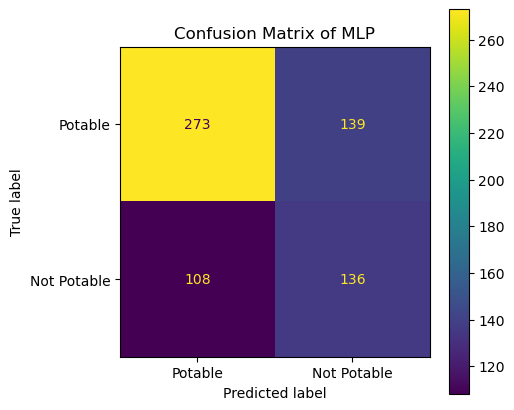

In [59]:
plot_confusion_matrix(y_test, mlp_prediction, "Confusion Matrix of MLP")

<hr style="height:2px; border-width:0; color:black">

<h3>SVC:</h3>

<b>Step 1: </b>Definition of the hyperparameters we will be injecting in the model for training:

In [60]:
svc_hyperparameters = {
    'kernel': ["linear", "rbf", "poly"],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'C': [0.1, 1, 10, 100, 1000],
    'degree': [0, 4]
}

<b>Step 2: </b>Train the model with different sets of hyperparameters defined in the first step

In [61]:
from sklearn.svm import SVC

In [62]:
svc_classifier = SVC()

In [63]:
k_fold_cv = 50 # Stratified 5-fold cross validation

svc = RandomizedSearchCV(svc_classifier, param_distributions=svc_hyperparameters, cv=k_fold_cv,
 n_iter = 5, scoring='neg_mean_absolute_error', verbose=2, random_state=42,
 n_jobs=-1, return_train_score=True)

In [64]:
svc_start_time = time.time()
svc.fit(X_train, y_train)
svc_stop_time = time.time()

print("Best hyper parameters to use: ", svc.best_params_)

Fitting 50 folds for each of 5 candidates, totalling 250 fits
Best hyper parameters to use:  {'kernel': 'rbf', 'gamma': 1, 'degree': 4, 'C': 10}


In [65]:
svc_time = svc_stop_time - svc_start_time
run_times.append(svc_time)
print("Training time: %.2f seconds | (%.2f minutes)" % (svc_time, svc_time/60))

Training time: 17.59 seconds | (0.29 minutes)


<b>Save the trained model</b>

In [66]:
pickle.dump(svc, open(svc_saved_model, 'wb'))

<b>Step 3: </b> Predict the test dataset, store, and display the metrics

In [67]:
svc_prediction = svc.predict(X_test)

In [68]:
metrics["SVC"] = [
    accuracy_score(svc_prediction, y_test), # calculate the accuracy score of k nearest neighbors
    f1_score(svc_prediction, y_test) # calculate the f1 score of k nearest neighbors
]

<b>Classification report of SVC:</b>

In [69]:
print(classification_report(svc_prediction, y_test))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       531
           1       0.23      0.45      0.30       125

    accuracy                           0.61       656
   macro avg       0.53      0.55      0.52       656
weighted avg       0.72      0.61      0.65       656



<b>Confusion Matrix for SVC</b>

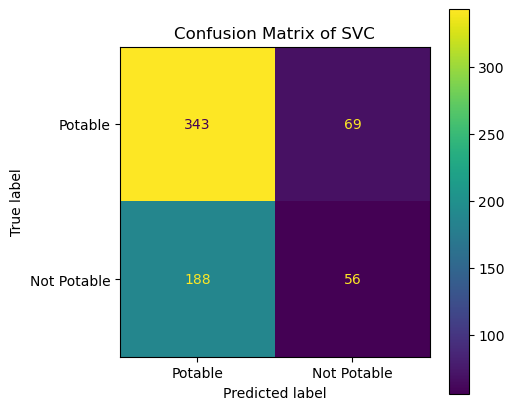

In [70]:
plot_confusion_matrix(y_test, svc_prediction, "Confusion Matrix of SVC")

<hr style="height:2px; border-width:0; color:black">

<h3>Gaussian Naive Bayes:</h3>

<b>Step 1: </b>Definition of the hyperparameters we will be injecting in the model for training:

In [71]:
gaussian_nb_hyperparameters = {
    "var_smoothing": np.logspace(0,-9, num=100)
}

<b>Step 2: </b>Train the model with different sets of hyperparameters defined in the first step

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gaussian_nb_classifier = GaussianNB()

In [74]:
gaussian_nb = RandomizedSearchCV(
    gaussian_nb_classifier,
    gaussian_nb_hyperparameters,
    cv = 10,
    scoring = "f1",
    n_jobs = -1,
    random_state = 42
)

In [75]:
gaussian_nb_start_time = time.time()
gaussian_nb.fit(X_train, y_train)
gaussian_nb_stop_time = time.time()

In [76]:
gaussian_nb_time = gaussian_nb_stop_time - gaussian_nb_start_time
run_times.append(gaussian_nb_time)
print("Training time: %.2f seconds | (%.2f minutes)" % (gaussian_nb_time, gaussian_nb_time/60))

Training time: 0.05 seconds | (0.00 minutes)


<b>Save the trained model</b>

In [77]:
pickle.dump(gaussian_nb, open(gaussian_nb_saved_model, 'wb'))

<b>Step 3: </b> Predict the test dataset, store, and display the metrics

In [78]:
gaussian_nb_prediction = gaussian_nb.predict(X_test)

In [79]:
metrics["Gaussian NB"] = [
    accuracy_score(gaussian_nb_prediction, y_test), # calculate the accuracy score of gaussian nb
    f1_score(gaussian_nb_prediction, y_test) # calculate the f1 score of gaussian nb
]

<b>Classification report of Gaussian NB:</b>

In [80]:
print(classification_report(gaussian_nb_prediction, y_test))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       407
           1       0.45      0.44      0.45       249

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656



<b>Confusion Matrix for Gaussian Naive-Bayes</b>

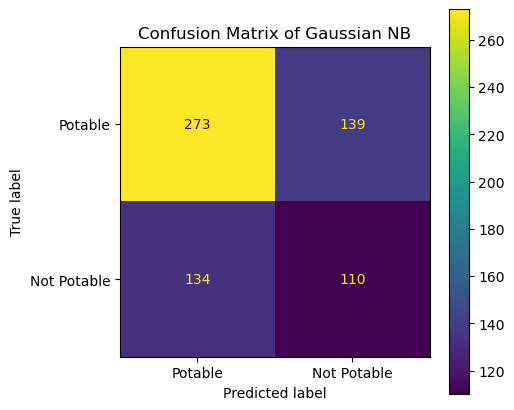

In [81]:
plot_confusion_matrix(y_test, gaussian_nb_prediction, "Confusion Matrix of Gaussian NB")

<hr style="height:2px; border-width:0; color:black">

<h3>Bagging Multiple Models:</h3>

In order to improve the results, we will combine different models through bagging. These models will run independently for each other and the output will be the result of different model voting a specific input

<b>Step 1: </b>Combining predictions in a data structure

In [82]:
bagging_predictions = [] # Create a data structure that contains the results from different models

In [83]:
# Create an array of model predictions
model_predictions = [
    random_forest_prediction,
    decision_tree_prediction,
    knn_prediction,
    mlp_prediction,
    gaussian_nb_prediction,
]

In [84]:
# Populate the bagging prediction data structure with the prediction of different models
bagging_start_time = time.time()
for test_datapoint in range(len(y_test)): # Iterate over each test data
    predictions = []
    for model_prediction in model_predictions: # Iterate over each model prediction for this test data point
        predictions.append(model_prediction[test_datapoint])
    bagging_predictions.append(predictions)

<b>Step 2: </b>Make the models vote on the prediction for each test datapoint

In [85]:
bagging_predictions = list(map(
    lambda prediction: 1 if sum(prediction) > len(model_predictions) // 2 else 0,
    bagging_predictions
))
bagging_stop_time = time.time()

In [86]:
bagging_time = bagging_stop_time - bagging_start_time
run_times.append(bagging_time)
print("Training time: %.2f seconds | (%.2f minutes)" % (bagging_time, bagging_time/60))

Training time: 0.00 seconds | (0.00 minutes)


<b>Step 3: </b> Store, and display the metrics

In [87]:
metrics["Bagging"] = [
    accuracy_score(bagging_predictions, y_test), # calculate the accuracy score of bagging
    f1_score(bagging_predictions, y_test) # calculate the f1 score of bagging
]

<b>Classification report of Bagging:</b>

In [88]:
print(classification_report(bagging_predictions, y_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       415
           1       0.54      0.54      0.54       241

    accuracy                           0.66       656
   macro avg       0.63      0.64      0.64       656
weighted avg       0.66      0.66      0.66       656



<b>Confusion Matrix for Bagging</b>

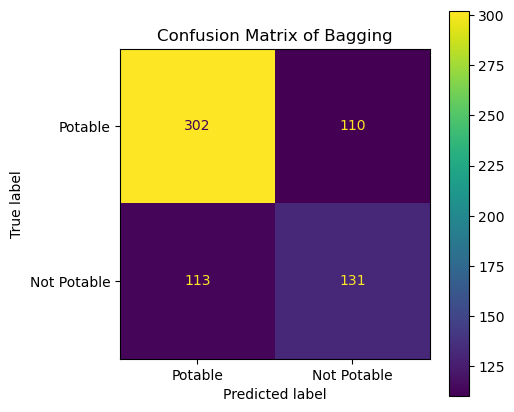

In [89]:
plot_confusion_matrix(y_test, bagging_predictions, "Confusion Matrix of Bagging")

<hr style="height:2px; border-width:0; color:black">

<h3>Boosting:</h3>

In order to improve the results, we will use boosting to run models sequentially

<b>Step 1: </b>Definition of the hyperparameters we will be injecting in the model for training:

In [90]:
adaboost_hyperparameters = {
    "n_estimators": [50, 100, 1000]
}

<b>Step 2: </b>Train the model with different sets of hyperparameters defined in the first step

In [91]:
from sklearn.ensemble import AdaBoostClassifier

In [92]:
adaboost_classifier = AdaBoostClassifier()

In [93]:
adaboost = RandomizedSearchCV(
    adaboost_classifier,
    adaboost_hyperparameters,
    cv = 10,
    scoring = "f1",
    n_jobs = -1,
    random_state = 42
)

In [94]:
adaboost_start_time = time.time()
adaboost.fit(X_train, y_train)
adaboost_stop_time = time.time()

In [95]:
adaboost_time = adaboost_stop_time - adaboost_start_time
run_times.append(adaboost_time)
print("Training time: %.2f seconds | (%.2f minutes)" % (adaboost_time, adaboost_time/60))

Training time: 4.00 seconds | (0.07 minutes)


<b>Save the trained model</b>

In [96]:
pickle.dump(adaboost, open(boosting_saved_model, 'wb'))

<b>Step 3: </b> Predict the test dataset, store, and display the metrics

In [97]:
adaboost_predictions = adaboost.predict(X_test)

In [98]:
metrics["Boosting"] = [
    accuracy_score(adaboost_predictions, y_test), # calculate the accuracy score of bagging
    f1_score(adaboost_predictions, y_test) # calculate the f1 score of bagging
]

<b>Classification report of Boosting:</b>

In [99]:
print(classification_report(adaboost_predictions, y_test))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65       380
           1       0.50      0.45      0.47       276

    accuracy                           0.58       656
   macro avg       0.57      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656



<b>Confusion Matrix for Boosting</b>

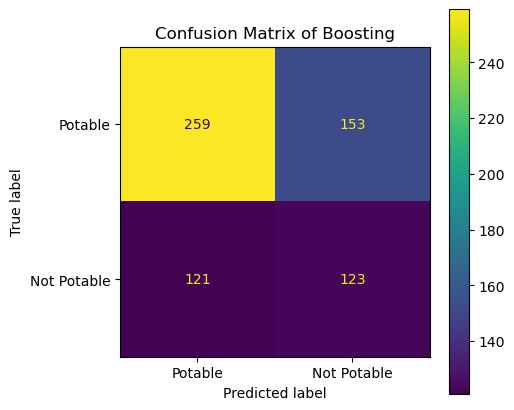

In [100]:
plot_confusion_matrix(y_test, adaboost_predictions, "Confusion Matrix of Boosting")

<hr style="height:2px; border-width:0; color:black">

<h2>Analysis of the results</h2>

This section analyses the metrics of the different models that were trained. We will compare both accuracy scores and f1-scores to establish conclusions.

<h3>Accuracy scores</h3>

The following array contains the accuracy scores of our different trained models

In [101]:
accuracy_scores = []
for key in metrics:
    accuracy_scores.append(metrics[key][0])

<h3>F1 scores</h3>

The following array contains the F1 scores of our different trained models

In [102]:
f1_scores = []
for key in metrics:
    f1_scores.append(metrics[key][1])

<h3>Models</h3>

The following array contains the different models that were trained

In [103]:
models = []

In [104]:
for model in metrics:
    models.append(model)

<h3>Run times</h3>

The following graph contains the time it took to train each model 

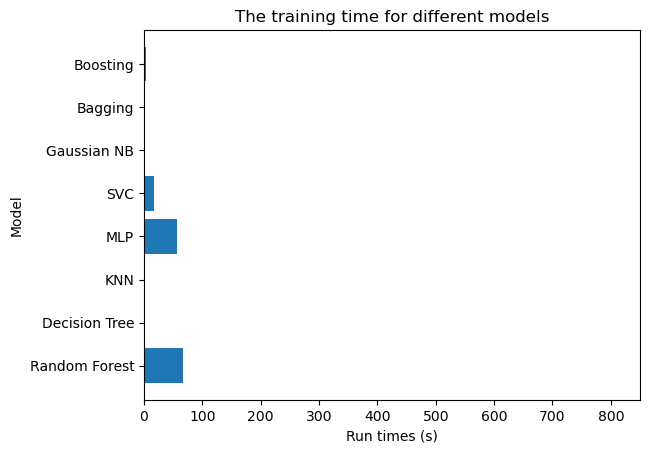

In [105]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(models, run_times)
plt.xlim([0, 850])
plt.xlabel("Run times (s)")
plt.ylabel("Model")
plt.title("The training time for different models")
plt.show()

<h3>Accuracy Comparison</h3>

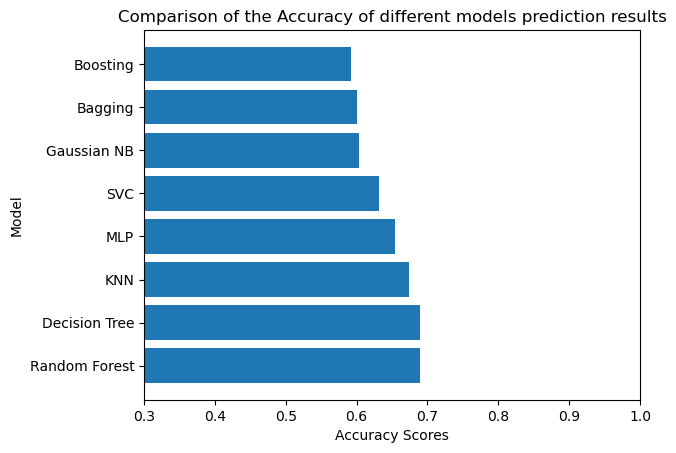

In [342]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(models, accuracy_scores)
plt.xlim([0.3, 1])
plt.xlabel("Accuracy Scores")
plt.ylabel("Model")
plt.title("Comparison of the Accuracy of different models prediction results")
plt.show()

<b>The Models with the best accuracy are:<br></b>

In [343]:
#Sort the accuracy scores in descending order
accuracy_scores.sort(reverse = True)

#For each model, print the accuracy score
for i, model in enumerate(models):
    accuracy = accuracy_scores[i] * 100
    if i < 3:
        print(f"\x1b[6;30;46m \033[1m{i+1}) {model}:\033[0m %.2f%%" % accuracy)
    else:
        print(f"\033[1m{i+1}) {model}:\033[0m %.2f%%" % accuracy)

 1) Random Forest: 68.90%
 2) Decision Tree: 68.90%
 3) KNN: 67.38%
4) MLP: 65.40%
5) SVC: 63.11%
6) Gaussian NB: 60.37%
7) Bagging: 60.06%
8) Boosting: 59.15%


<b>Average accuracy for all models:</b>

In [363]:
avg_model_accuracy(accuracy_scores)

Average accuracy of all models: 64.16%


<h3>F1 Score Comparison</h3>

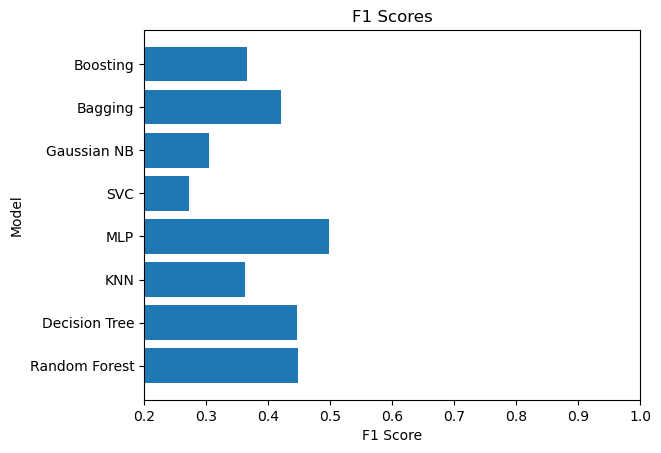

In [344]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(models, f1_scores)
plt.xlim([0.2, 1])
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.title("F1 Scores")
plt.show()

<b>The Models with the best F1 score are:<br></b>

In [346]:
#Sort the accuracy scores in descending order
f1_scores.sort(reverse = True)

#For each model, print the accuracy score
for i, model in enumerate(models):
    f1_score = f1_scores[i] * 100
    if i < 3:
        print(f"\x1b[6;30;46m\033[1m{i+1}) {model}:\033[0m %.2f%%" % f1_score)
    else:
        print(f"\033[1m{i+1}) {model}:\033[0m %.2f%%" % f1_score)

1) Random Forest: 49.89%
2) Decision Tree: 44.86%
3) KNN: 44.63%
4) MLP: 42.05%
5) SVC: 36.59%
6) Gaussian NB: 36.31%
7) Bagging: 30.46%
8) Boosting: 27.22%


<h3>Comparison with other Projects</h3>

Our data was gathered from kaggle which allowed us to see what other projects were built around this dataset. We decided to compare our results with other projects to judge if our models performed well or poorly:

<table>
  <tr>
    <th>Project Name</th>
    <th>Accuracy</th>
    <th>Project Link</th>
  </tr>
  <tr>
    <td>Water Quality|Plotly|EDA|7 Models</td>
    <td>70%</td>
    <td>https://www.kaggle.com/datasets/adityakadiwal/water-potability/code</td>
  </tr>
  <tr>
    <td>Is it safe to drink ??</td>
    <td>68%</td>
    <td>https://www.kaggle.com/code/muku007/is-it-safe-to-drink</td>
  </tr>
  <tr>
    <td>Water_Potability💧</td>
    <td>68%</td>
    <td>https://www.kaggle.com/code/manishwahale/water-potability</td>
  </tr>
  <tr>
    <td>Water-Quality EDA</td>
    <td>64%</td>
    <td>https://www.kaggle.com/code/semanurkps/water-quality-eda</td>
  </tr>
  <tr>
    <td>Water Quality prediction with ANN (DL) + EDA</td>
    <td>68%</td>
    <td>https://www.kaggle.com/code/hossamgalal68/water-quality-prediction-with-ann-dl-eda</td>
  </tr>
</table>

Our best model (Bagging) had an accuracy of 68.6% which falls into the accuracies gathered by other projects. Some projects used advanced Neural Network techniques which allowed them to gather better accuracy results.